In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
path = os.getcwd() + r'\ex1data2.txt'

In [5]:
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [6]:
#feature normalization
data = (data - data.mean()) / data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [7]:
#same as simple linear regression
data.insert(0,'Ones',1)

num_cols = data.shape[1]
X = data.iloc[:,0:num_cols-1]
y = data.iloc[:,num_cols-1:num_cols]

X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))

In [9]:
alpha = 0.01
iters = 1000

In [8]:
def compute_cost(X,y, theta):
    inner = np.power(((X*theta.T)-y), 2)
    return np.sum(inner) / (2*len(X))

def gradient_descent(X, y, theta, alpha, iters):
    #creates a matrix for new theta with the same dimensions
    temp = np.matrix(np.zeros(theta.shape))
    #gets the number of parameters alt: theta.shape[1]
    num_parameters = int(theta.ravel().shape[1])
    #creates a array of all cost function values
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(num_parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha/ len(X)) * np.sum(term))
        theta = temp
        cost[i] = compute_cost(X, y, theta)
        
    return theta, cost

In [10]:
g, cost = gradient_descent(X, y, theta, alpha, iters)
g

matrix([[ -1.10868761e-16,   8.78503652e-01,  -4.69166570e-02]])

In [13]:
compute_cost(X, y, g)

0.13070336960771892

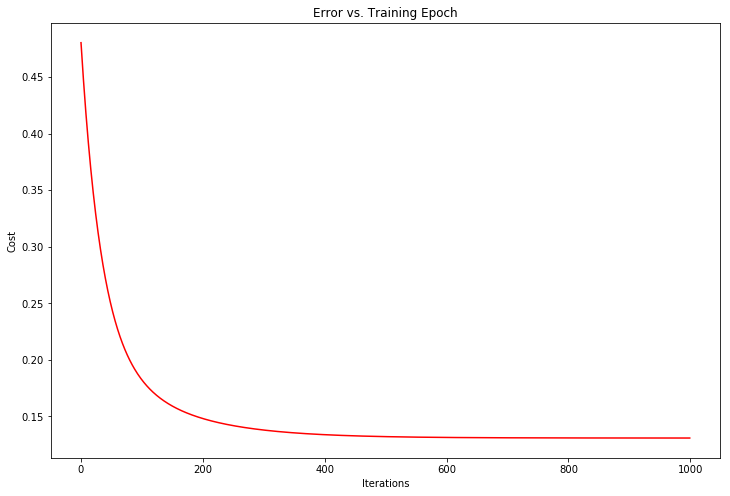

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set(xlabel='Iterations', ylabel='Cost', title='Error vs. Training Epoch')

In [19]:
len(cost)

1000

In [22]:
#we can use a python library to do the exact same thing
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)